In [ ]:
import math
import matplotlib.pyplot as plt

def sigmoid (x):
  return(1/(1+math.exp(-1*x)))

def ReLu (x):
  if (x>0):
    return x
  else : return 0

def gradient (x):
  return (1-sigmoid(x))*sigmoid(x)

def ReLu_diff (x):
  if (x>0):
    return 1
  else : return 0


def foward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output):
  #function input is the following :
  #pixel_input is an 1*9 array 
  #weight_input and weight_output is an 2*9 array
  #bias_input is an 1*2 array
  #bias_output is an 1*9 array 

  #function output is the following
  #pixel_output is an 1*9 array

  #encoding side
  encoded_1 = 0
  encoded_2 = 0
  for iteration in pixel_input:
    encoded_1 = encoded_1 + pixel_input[iteration]*weight_input[0][iteration] + bias_input[0]  
    ############################ First Instruction testing ############################
    encoded_2 = encoded_2 + pixel_input[iteration]*weight_input[1][iteration] + bias_input[1]  
  #passing through activation function (ReLu) and rewriting encoded_1 and encoded_2 value
  encoded_1_activated = ReLu(encoded_1)
  encoded_2_activated = ReLu(encoded_2)

    #reconstruction side
  pixel_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  non_activated_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

  for iteration in range (0,9):
    non_activated_output[iteration] = encoded_1_activated*weight_output[0][iteration] + encoded_2_activated*weight_output[1][iteration]+ bias_output[iteration]
    pixel_output[iteration] = sigmoid(non_activated_output[iteration])

  return pixel_output,encoded_1,encoded_2,non_activated_output,encoded_1_activated,encoded_2_activated

def backward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output):

    pixel_output,encoded_1,encoded_2,non_activated_output,encoded_1_activated,encoded_2_activated = foward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output)
    error_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    differential_error_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    d_bias_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    d_weight_output = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    error_middle_layer = [0.0,0.0]
    d_weight_input = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    d_bias_input = [0.0,0.0]
    learning_rate = 1.25


    for iteration in range (0,9):
      error_output[iteration] = -pixel_input[iteration]*(1-pixel_output[iteration])+(1-pixel_output[iteration])*pixel_output[iteration] #calculating error
      differential_error_output[iteration] = pixel_output[iteration]*(1-pixel_output[iteration]) #calculating differrential error(idk what this for)
      d_weight_output[0][iteration] = error_output[iteration]*encoded_1_activated #calculating output weight error 1
      d_weight_output[1][iteration] = error_output[iteration]*encoded_2_activated #calculating output weight error 2
      d_bias_output[iteration] = error_output[iteration] #calculating output bias differential
      error_middle_layer[0] = error_middle_layer[0] + error_output[iteration]*weight_output[0][iteration]*ReLu_diff(encoded_1) #calculating middle layer error
      error_middle_layer[1] = error_middle_layer[1] + error_output[iteration]*weight_output[1][iteration]*ReLu_diff(encoded_2) #calculating middle layer error
      d_weight_input[0][iteration] = error_middle_layer[0]*pixel_input[iteration] #calculating weight input differential
      d_weight_input[1][iteration] = error_middle_layer[1]*pixel_input[iteration] #calculating weight input differential
      d_bias_input[0] = error_middle_layer[0]
      d_bias_input[1] = error_middle_layer[1]

    updated_weight_input = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    updated_weight_output = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    updated_bias_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    updated_bias_input = [0.0,0.0]

    for iteration in range(0,9):
      updated_weight_output[0][iteration] = weight_output[0][iteration]- learning_rate*d_weight_output[0][iteration]
      updated_weight_output[1][iteration] = weight_output[1][iteration]- learning_rate*d_weight_output[1][iteration]
      updated_weight_input[0][iteration] = weight_input[0][iteration]- learning_rate*d_weight_input[0][iteration]
      updated_weight_input[1][iteration] = weight_input[1][iteration]- learning_rate*d_weight_input[1][iteration]
      updated_bias_output[iteration] = bias_output[iteration]- learning_rate*d_bias_output[iteration]
    
    updated_bias_input[0] = bias_input[0]-learning_rate*d_bias_input[0]
    updated_bias_input[1] = bias_input[1]-learning_rate*d_bias_input[1]

    return updated_weight_output,updated_weight_input,updated_bias_input,updated_bias_output,pixel_output,encoded_1_activated

def cross_entropy_error(data_in,data_out): #cross entropy for measurement
  accumulator = 0
  for i in range (9):
    accumulator = accumulator + (data_in[i]*math.log(data_out[i],10)+((1-data_in[i])*math.log((1-data_out[i]),10)))
  accumulator = -(accumulator/9)
  return accumulator

#main section

training_number = 10000
error_history =[]
temporary_error_history = 0
x_scale = []


#declaration and initial 
#pixel_input,weight_input,weight_output,bias_input,bias_output
pixel_input = [1,0,1,0,1,0,1,0,1]
pixel_output = [0,0,0,0,0,0,0,0,0]
weight_input = [[1.3725,0.2184,1.1919,-0.3476,1.9446,0.0867,1.4450,-0.0088,1.3885],[0.8603,1.6803,0.4377,2.2810,-1.0389,2.0551,0.1210,1.7158,0.1502]]
weight_output = [[0.3910,0.0356,0.5649,0.2035,0.3206,0.3766,0.1841,0.1040,0.4549],[0.1959,0.3785,0.9305,0.7602,0.7708,0.5967,0.7916,0.8103,0.9806]]
bias_input = [-0.5,-0.5]
bias_output =  [-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5]

for training in range(0,training_number):
  weight_output,weight_input,bias_input,bias_output,pixel_output,test = backward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output)
  temporary_error_history = cross_entropy_error(pixel_input,pixel_output)
  error_history.append(math.log(temporary_error_history,10))
  x_scale.append(training)


plt.plot(x_scale,error_history, color="red")  
plt.show()
plt.close()
#print(pixel_output)
#print(weight_input)
#print(test)


In [1]:
# 0_0000000_00000000 (sign_exp_fraction)
# Converting floating point to 16-bit representation
def pos_float16_to_bin(num):
   b = ['0'] * 16
   dec_num = int(num)
   exp = 8; frac = 7
   float_num = num - dec_num
   #print(float_num, dec_num)

   b[15] = '0'

   while(dec_num > 0):
      if (dec_num % 2 == 0) : b[exp] = '0'
      else : b[exp] = '1'
      #print(dec_num)
      exp += 1
      dec_num //= 2
   
   for i in range (7, -1, -1):
      float_num *= 2
      if (float_num == 1): 
         b[frac] = '1'
         break
      elif (float_num > 1):
         b[frac] = '1'
         float_num = float_num - int(float_num)
      else:
         b[frac] = '0'
      frac -= 1
   #print(b)
   return b

def float16_to_bin(num):
   temp_num = 0
   
   if (num < 0): temp_num = -num
   else: temp_num = num
   b = pos_float16_to_bin(temp_num)

   flag = 0
   final = ['0'] * len(b)
   
   for i in range(0, 8): final[i] = b[i]

   if (num < 0):
      for i in range (0, len(b)):
         if (b[i] == '1'):
            if (flag == 0):
               flag = 1
               final[i] = b[i]
            else:
               if (b[i] == '0'): final[i] = '1'
               else: final[i] = '0'
         else:
            if (flag == 0):
               
               final[i] = b[i]
            else:
               if (b[i] == '0'): final[i] = '1'
               else: final[i] = '0'
   else: final = b
   result = ""
   dec = 0

   #print(final)

   for i in range(15,-1,-1):
      if (i == 15 or i == 8): result += str(final[i]) + '_'
      else: result += str(final[i])
      dec += int(final[i]) * (2**i)
   
   return [result, dec]



# result = float16_to_bin(8.25)
# for i in range(15,0,-1):
#    if (i == 15 or i == 8): print(result[i], end="_")
#    else: print(result[i], end="")
print(float16_to_bin(-1.75)[0])#, float16_to_bin(0.0625)[1])

1_1111110_01000000


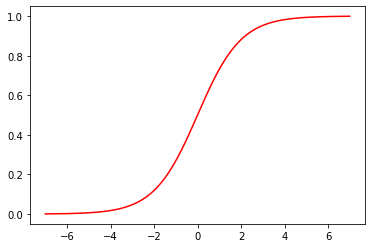

[0.0009110511944006454, 0.0009146136866700927, 0.0009181900965849467, 0.0009217804784171762, 0.0009253848866495987, 0.0009290033759766927, 0.0009326360013054127, 0.0009362828177560106, 0.0009399438806628558, 0.0009436192455752618, 0.0009473089682583148, 0.0009510131046937041, 0.0009547317110805592, 0.0009584648438362854, 0.0009622125595974063, 0.0009659749152204077, 0.0009697519677825861, 0.0009735437745828978, 0.0009773503931428146, 0.00098117188120718, 0.0009850082967450694, 0.0009888596979506555, 0.0009927261432440737, 0.0009966076912722927, 0.0010005044009099887, 0.0010044163312604223, 0.001008343541656317, 0.0010122860916607463, 0.0010162440410680167, 0.0010202174499045606, 0.0010242063784298284, 0.0010282108871371872, 0.0010322310367548194, 0.0010362668882466276, 0.0010403185028131417, 0.001044385941892429, 0.001048469267161009, 0.0010525685405347708, 0.0010566838241698937, 0.0010608151804637727, 0.001064962672055945, 0.0010691263618290232, 0.001073306312909629, 0.001077502588669

,Floating Point Input,Binary Input,Binary in Decimal Input,Floating Point Output,Binary Output,Binary in Decimal Output
0,-7.000000,1_1111001_00000000,63744,0.000911,0_0000000_00000000,0
1,-6.996094,1_1111001_00000001,63745,0.000915,0_0000000_00000000,0
2,-6.992188,1_1111001_00000010,63746,0.000918,0_0000000_00000000,0
3,-6.988281,1_1111001_00000011,63747,0.000922,0_0000000_00000000,0
4,-6.984375,1_1111001_00000100,63748,0.000925,0_0000000_00000000,0
...,...,...,...,...,...,...
3579,6.980469,0_0000110_11111011,1787,0.999071,0_0000000_11111111,255
3580,6.984375,0_0000110_11111100,1788,0.999075,0_0000000_11111111,255
3581,6.988281,0_0000110_11111101,1789,0.999078,0_0000000_11111111,255
3582,6.992188,0_0000110_11111110,1790,0.999082,0_0000000_11111111,255


In [6]:
import math
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid (x):
  return(1/(1+math.exp(-1*x)))


step = 0.5**8
#print(f"{step}   {14 / step}")
high_x_range = 7
low_x_range = -7

output = []
bin_out = []
x = []
bin_in = []
bin_in_pos = []

binDec_in = []
binDec_out = []


accumulator_2 = 0

accumulator = low_x_range
while (accumulator < high_x_range):
  output.append(sigmoid(accumulator))

  x.append(accumulator)
  bin_in.append(float16_to_bin(x[accumulator_2])[0])
  bin_in_pos.append(float16_to_bin(-1 * x[accumulator_2])[0])
  binDec_in.append(float16_to_bin(x[accumulator_2])[1])

  accumulator = accumulator+step
  accumulator_2 = accumulator_2+1

  bin_out.append(float16_to_bin(sigmoid(accumulator))[0])
  binDec_out.append(float16_to_bin(sigmoid(accumulator))[1])
  #bin_out += float16_to_bin(sigmoid(accumulator)) + ','

#print(bin(0.1))

plt.plot(x,output, color="red")  
plt.show()
print(output)
print(bin_out)



f = open("sigmoid_lut.txt","w")
the_text = ""
for i in range (0,112):
  the_text = '{:<9}'.format(str(binDec_in[i])) + ":\tresult = 16'd" + str(binDec_out[i]) + "\n"
  f.write(the_text)
f.close()
print(accumulator_2)

pd.set_option('display.max_rows', 20)
data = {'Floating Point Input' : x,
        'Binary Input' : bin_in,
        'Binary in Decimal Input' : binDec_in,
        #'Binary Input Pos' : bin_in_pos,
        'Floating Point Output' : output,
        'Binary Output' : bin_out,
        'Binary in Decimal Output' : binDec_out}

df = pd.DataFrame(data)
df

#df.to_csv('sigmoid_lut.csv', index=False)

In [35]:
import struct
import numpy
number = 20.21
print(numpy.float16(number))
s = struct.pack('!f', numpy.float16(number))
b = ''.join(format(c, '08b') for c in s)
# for c in s:
#    print(c)
print(len(b))
print(b)

# def binary(num):
#     return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

#print(binary(0.2))

20.2
32
01000001101000011010000000000000
